In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats

In [2]:
def ry():
  theta = np.random.uniform(0,1)
  y = np.random.binomial(n=3,p=theta)
  return y

In [3]:
# Suppose Y=2, we want to known the likely range of theta, plot a histogram of (theta|Y=2)
def prob_theta_given_Y(thetaLow, thetaHigh, y, n=10000):
  # generate a sample of size n from the uniform distribution
  theta_sample = np.random.uniform(low=0.0,high=1.0,size=n)
  # Define weights wi proportional to PrY (y | Θ = theta_sample)
  w = scipy.stats.binom.pmf(2, n=3,p=theta_sample) # when y = 2
  w = w / np.sum(w)
  # use weights to estimate the probability that theta is in bin [thetaLow, thetaHigh)
  return np.sum(w * np.where((theta_sample >= thetaLow) & (theta_sample < thetaHigh),1,0))

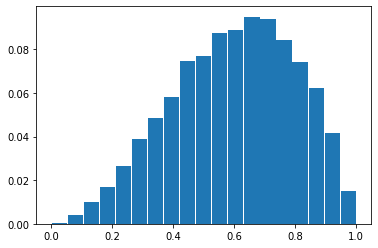

In [4]:
bins_edge = np.linspace(0,1,20)
lows, highs = bins_edge[:-1], bins_edge[1:]
bar_heights = [prob_theta_given_Y(l,h,y=2) for l,h in zip(lows,highs)]
fig,ax = plt.subplots()
ax.bar(x = (lows+highs)/2, height=bar_heights, width=1/len(bins_edge))
plt.show()

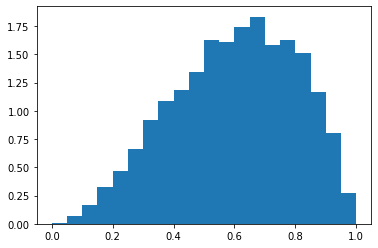

In [5]:
# generate a sample of size n from the uniform distribution
theta_sample = np.random.uniform(low=0.0,high=1.0,size=10000)
# Define weights wi proportional to PrY (y | Θ = theta_sample)
w = scipy.stats.binom.pmf(2, n=3,p=theta_sample) # when y = 2
w = w / np.sum(w)
plt.hist(theta_sample,weights=w,bins=20,density=True)
plt.show()

## Coin tossing

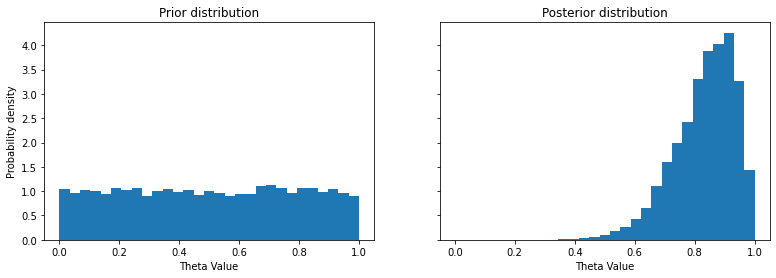

In [6]:
# the prior distribution theta is uniform[0,1]
theta_sample = np.random.uniform(size=10000)
# the distribution of observed data follows a binomial distribution Binom(n,theta)
# toss n = 10, x = 9
n,x = 10,9
# the likelihood of the observed data is the probability mass function for Binom(n,theta)
# but no point of including the constant term since it will cancel out
prx = theta_sample**x * (1-theta_sample)**(n-x)
# define the weights
w = prx / np.sum(prx)
fig,(ax1,ax2) = plt.subplots(1,2, sharey=True, figsize=(13,4))
ax1.hist(theta_sample,density=True,bins=np.linspace(0,1,30))
ax2.hist(theta_sample,weights=w,density=True,bins=np.linspace(0,1,30))
ax1.set_xlabel("Theta Value")
ax2.set_xlabel("Theta Value")
ax1.set_ylabel("Probability density")
ax1.set_title("Prior distribution")
ax2.set_title("Posterior distribution")
plt.show()

## Multiple Unknowns

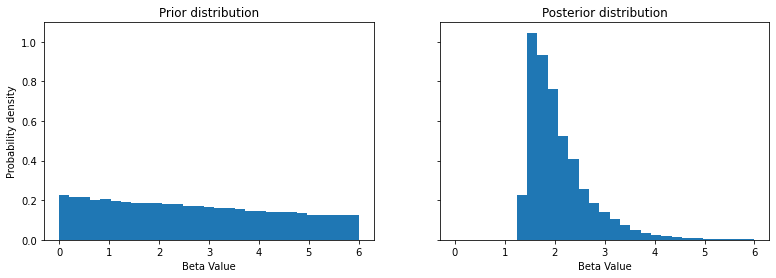

In [7]:
# Prior distribution needs to specify all unknown parameters,
# So we generate a random tuple sample of (A,B) values and assume A and B are independent
lambda0,mu0 = 0.2,0.1
samples = 100000
a_sample = np.random.exponential(scale=1/lambda0, size=samples)
b_sample = np.random.exponential(scale=1/mu0,size=samples)

# for every prior sample (ai,bi), we need to compute Pr(dataset|A=ai,B=bi),
# the a_sample vector and b_sample vector line up, so we use vectorised thinking
x = [2,3,2.1,2.4,3.14,1.8]
n = len(x)
minx,maxx = min(x),max(x)
# prx is a joint posterior distribution of (A,B)
# we can ignore A if only want to know B - to find the marginal distribution for B
prx = np.power(1/b_sample,n) *np.where((a_sample <= minx) & (maxx <= a_sample + b_sample),1,0)
w = prx / np.sum(prx)

fig,(ax1,ax2) = plt.subplots(1,2, sharey=True, figsize=(13,4))
ax1.hist(b_sample,density=True,bins=np.linspace(0,6,30))
ax2.hist(b_sample,weights=w,density=True,bins=np.linspace(0,6,30))
ax1.set_xlabel("Beta Value")
ax2.set_xlabel("Beta Value")
ax1.set_ylabel("Probability density")
ax1.set_title("Prior distribution")
ax2.set_title("Posterior distribution")
plt.show()

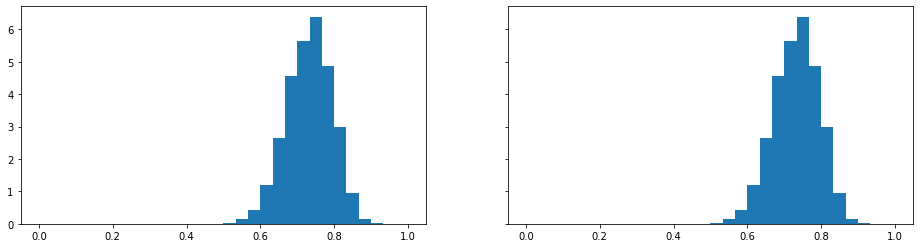

In [8]:
# Step 1. Generate a sample from Θ
theta_sample = np.random.uniform(0,1,size=10000)

# Step 2. For each sample value θ[i], compute a weight w[i] = Pr(x|Θ=θ[i]), and rescale.
# Here x is the entirety of the observed data.
# If we just multiply lots of probabilities together we're in danger of underflow,
# so we should compute w with more cunning ...
n = 10
sx = np.sum([9,10,8,10])
# First compute log(w[i]).
logprx = sx * np.log(theta_sample) + (5*n-sx) * np.log(1-theta_sample)
# add a well-chosen constant, equivalent to multiple w[i] by a constant,
# and the constant cancels out when we normalise w
# choose max(w[i]) so that the largest after scaling is 1, avoid underflow
maxlogprx = np.max(logprx)
# define weights
w = np.exp(logprx - maxlogprx)
w = w / np.sum(w)

w_noNorm = np.exp(logprx)
w_noNorm = w_noNorm / np.sum(w_noNorm)

# Step 3. Reason about (Θ|Y=y) via this weighted sample
fig,(ax1,ax2) = plt.subplots(1,2,sharey=True,figsize=(16,4))
ax1.hist(theta_sample,weights=w, density=True, bins=30)
ax2.hist(theta_sample,weights=w_noNorm, density=True, bins=30)
plt.show()

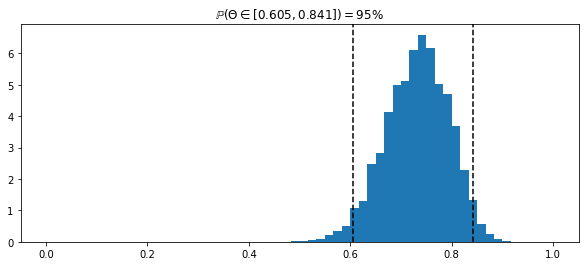

In [9]:
i = np.argsort(theta_sample)
theta_sample,w = theta_sample[i], w[i]
F = np.cumsum(w) # cumulative distribution
(lo,hi) = (theta_sample[F<0.025][-1], theta_sample[F>0.975][0])

fig,ax = plt.subplots(figsize=(10,4))
ax.hist(theta_sample, weights=w, density=True, bins=60)
ax.axvline(x=lo, linestyle='--', color='black')
ax.axvline(x=hi, linestyle='--', color='black')
ax.set_title(r'$\mathbb{P}(\Theta\in'+f'[{lo:.3},{hi:.3}]'+')=95\%$')
plt.show()

In [10]:
url = "https://www.cl.cam.ac.uk/teaching/2021/DataSci/data/galaxies.csv"
galaxies = pd.read_csv(url)
galaxies[:5]

,speed
0,9172
1,9350
2,9483
3,9558
4,9775


In [11]:
galaxies = galaxies['speed'].values.copy()

In [12]:
galaxies

array([ 9172,  9350,  9483,  9558,  9775, 10227, 10406, 16084, 16170,
       18419, 18552, 18600, 18927, 19052, 19070, 19330, 19343, 19349,
       19440, 19473, 19529, 19541, 19547, 19663, 19846, 19856, 19863,
       19914, 19918, 19973, 19989, 20166, 20175, 20179, 20196, 20215,
       20221, 20415, 20629, 20795, 20821, 20846, 20875, 20986, 21137,
       21492, 21701, 21814, 21921, 21960, 22185, 22209, 22242, 22249,
       22314, 22374, 22495, 22746, 22747, 22888, 22914, 23206, 23241,
       23263, 23484, 23538, 23542, 23666, 23706, 23711, 24129, 24285,
       24289, 24366, 24717, 24990, 25633, 26690, 26995, 32065, 32789,
       34279])

In [13]:
'''
fig, (ax1, ax2, ax3) = plt.subplots(3,1, sharex=True, gridspec_kw={'height_ratios':[1,1,0.2]})

# plot the ecdf and the fitted cdf
ef = np.arange(1, len(galaxies)+1)/len(galaxies)
ax1.plot(np.sort(galaxies),ef,drawstyle='steps-post',color='blue')
x = np. linspace(9300, 34000, 200)
ax1. plot(x, fitted_cdf(x), color="black" , lw=3, linestyle="dashed")

# plot the density histogram and the fitted pdf
ax2.hist(galaxies, bins=30, density=True, fc='blue', alpha=.3)
ax2.plot(x, fitted_pdf(x),lw=3, color='black', linestyle='dashed')

# plot the raw data
for x in galaxies:
  ax3.plot([x,x],[0,1],color='blue')
'''

'\nfig, (ax1, ax2, ax3) = plt.subplots(3,1, sharex=True, gridspec_kw={\'height_ratios\':[1,1,0.2]})\n\n# plot the ecdf and the fitted cdf\nef = np.arange(1, len(galaxies)+1)/len(galaxies)\nax1.plot(np.sort(galaxies),ef,drawstyle=\'steps-post\',color=\'blue\')\nx = np. linspace(9300, 34000, 200)\nax1. plot(x, fitted_cdf(x), color="black" , lw=3, linestyle="dashed")\n\n# plot the density histogram and the fitted pdf\nax2.hist(galaxies, bins=30, density=True, fc=\'blue\', alpha=.3)\nax2.plot(x, fitted_pdf(x),lw=3, color=\'black\', linestyle=\'dashed\')\n\n# plot the raw data\nfor x in galaxies:\n  ax3.plot([x,x],[0,1],color=\'blue\')\n'

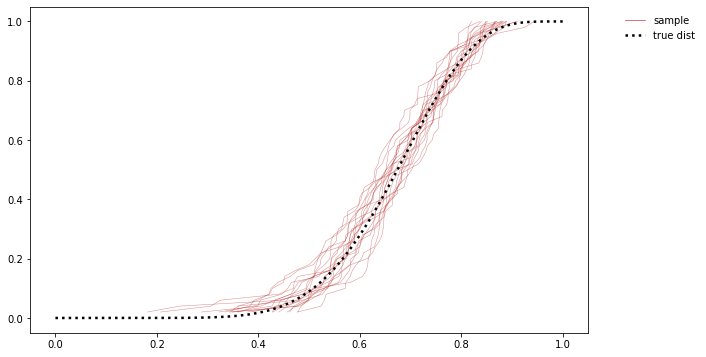

In [14]:
import scipy
alpha, beta = 10,5
fig,ax = plt.subplots(figsize=(10,6))

# plot the ecdf 20 times
for _ in range(20):
    x = np.random.beta(alpha,beta,size=50)
    ef = np.arange(1,len(x)+1)/len(x)
    plt.plot(np.sort(x), ef, alpha=0.5, color='firebrick', linewidth=0.5)

# a hack to force a legend entry for the samples
plt.plot([],[],color='firebrick',linewidth=0.6,label='sample')

# plot the true cdf
x = np.linspace(0,1,1000)
f = scipy.stats.beta.cdf(x,alpha,beta)
plt.plot(x,f,color='black', linestyle='dotted', linewidth=2.5, label='true dist')

plt.legend(bbox_to_anchor=(1.05,1), loc=2, frameon=False)
plt.show()

95% confidence interval [7.49,8.78]


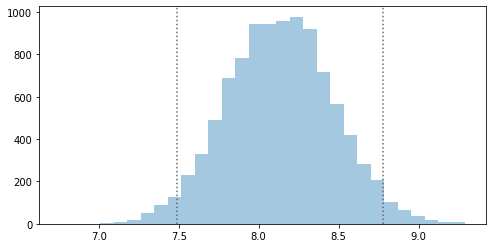

In [15]:
x = [7.2, 7.3, 7.8, 8.2, 8.8, 9.5]
n = len(x)

# 1. define the readout statistic
def mu_hat(x): return np.mean(x)

# 2. generate a synthetic dataset
sigma_hat = np.sqrt(np.mean((x-mu_hat(x))**2))
def rx(): return np.random.normal(loc=mu_hat(x), scale=sigma_hat, size=n)

# 3. sample the readout statistic and report its spread
mu_hat_ = [mu_hat(rx()) for i in range(10000)]
lo,hi = np.quantile(mu_hat_, [.025, .975])
print(f"95% confidence interval [{lo:.3},{hi:.3}]")

# draw the historgram with confidence interval
fig,ax = plt.subplots(figsize=(8,4))
ax.hist(mu_hat_, bins=30, alpha=.4)
ax.axvline(lo, linestyle='dotted', color='0.4')
ax.axvline(hi, linestyle='dotted', color='0.4')
plt.show()

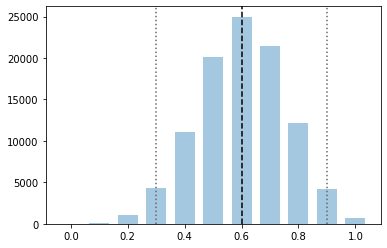

In [16]:
x,n = (6,10)

# 1. define the readout statistic
def p_hat(x): return x/n

# 2. to generate a synthetic dataset
def rx_star(): return np.random.binomial(n,p=p_hat(x))

# 3. sample the readout statistic, and report its spread
p_hat_ = np.array([p_hat(rx_star()) for i in range(100000)])
lo, hi = np.quantile(p_hat_, [0.025, 0.975])

p,c = np.unique(np.array(p_hat_), return_counts=True)
plt.bar(p,c, width=0.07, alpha=0.4)
plt.axvline(lo, linestyle='dotted', color= '0.4')
plt.axvline(hi, linestyle='dotted', color= '0.4')
plt.axvline(p_hat(x), linestyle='dashed', color= 'black')
plt.show()

95% confidence: [-0.413,3.73]


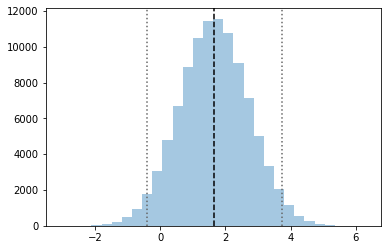

In [17]:
x = np.array([4.3, 5.1, 6.1, 6.8, 7.4, 8.8, 9.9])
y = np.array([8.3, 8.5, 8.9])
m,n = len(x), len(y)

# 1. define the readout statistic
def t_hat(x,y): return np.mean(y) - np.mean(x)

# 2. to generate a synthetic dataset
mu_hat, v_hat = np.mean(x), np.mean(y)
sigma_hat = np.sqrt((np.sum((x-mu_hat)**2) + np.sum((y-v_hat)**2))/(m+n))
# use resampling to synthesize new datasets (X*, Y*)
# goal is to create a synthetic dataset that matches the shape of the data we are given,
# so we need two separate lists
def rxy_star():
    return (np.random.normal(loc=mu_hat, scale=sigma_hat,size=m),
            np.random.normal(loc=v_hat, scale=sigma_hat,size=n))

# 3. sample the readout statistic, and report its spread
t_hat_ = np.array([t_hat(*rxy_star()) for i in range(100000)])
lo, hi = np.quantile(t_hat_, [0.025, 0.975])
plt.hist(t_hat_, bins=30, alpha=.4)
plt.axvline(lo, linestyle='dotted', color='0.4')
plt.axvline(hi, linestyle='dotted', color='0.4')
plt.axvline(t_hat(x,y), linestyle='dashed', color='black')
print(f'95% confidence: [{lo:.3},{hi:.3}]')

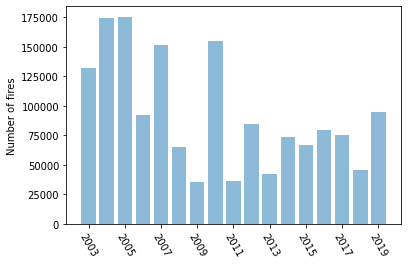

In [18]:
modis = pd.read_csv("https://www.cl.cam.ac.uk/teaching/2021/DataSci/data/modis.csv")
df = modis.loc[modis['day_of_year'] == 240]
plt.bar(df.year.values, df.num_fires, width=0.8, alpha=.5)
plt.xticks(np.arange(2003,2020,2), rotation=-60)
plt.ylabel('Number of fires')
plt.show()

95% confidence: [-2.5e+03,6.65e+04]


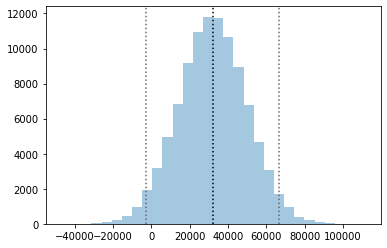

In [19]:
df = modis[(modis.day_of_year == 240) & (modis.year >= 2011) & (modis.year <= 2019)].sort_values('year')
year, fires = df.year.values, df.num_fires.values

# 1. define the readout statistic
def t_hat(x): return x[-1] - np.mean(x[:-1])

# 2. to generate a synthetic dataset
mu_hat = np.mean(fires[:-1])
pred = np.where(year <= 2018, mu_hat, mu_hat + t_hat(fires))
delta_hat = np.sqrt(np.mean((fires-pred)**2))
def rx_star(): return np.random.normal(loc=pred, scale=delta_hat)

# 3. sample the readout statistic, and report its spread
t_hat_ = np.array([t_hat(rx_star()) for i in range(100000)])
lo,hi = np.quantile(t_hat_, [.025, 0.975])
print(f'95% confidence: [{lo:.3},{hi:.3}]')
plt.hist(t_hat_, bins=30, alpha=.4)
plt.axvline(lo, linestyle='dotted', color='0.4')
plt.axvline(hi, linestyle='dotted', color='0.4')
plt.axvline(t_hat(fires), linestyle='dotted', color='black')
plt.show()

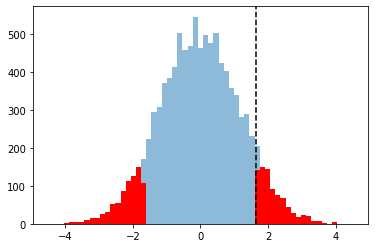

The p-value for the two-sided test is 0.166


In [28]:
# two sided hypothesis test
# observed dataset
x = [4.3, 5.1, 6.1, 6.8, 7.4, 8.8, 9.9]
y = [8.3, 8.5, 8.9]

# 2. define the test statistic
def t(x,y): return np.mean(y) - np.mean(x)

# 3. to generate a synthetic dataset, assuming H0
mu_hat = np.mean(np.concatenate([x,y]))
sigma_hat = np.sqrt(np.mean((np.concatenate([x,y])-mu_hat)**2))

def rxy_star():
  return (np.random.normal(loc=mu_hat, scale=sigma_hat, size=len(x)),
          np.random.normal(loc=mu_hat, scale=sigma_hat, size=len(y)))
  
# 4. sample the test statistic, compare to what was observed, and find p-value
t_ = np.array([t(*rxy_star()) for _ in range(10000)])
fig,ax = plt.subplots()
bins = np.linspace(-4.5,4.5,60)
ax.hist(t_, bins=bins, alpha=.5)
ax.hist(t_[t_ >= t(x,y)], bins=bins, color='red')
ax.hist(t_[t_ <= -t(x,y)], bins=bins, color='red')
plt.axvline(x=t(x,y), linestyle='dashed', color='black')
plt.show()

p1 = np.mean(t_ >= t(x,y))
p2 = np.mean(t_ <= t(x,y))
p = 2* min(p1,p2)
print(f'The p-value for the two-sided test is {p:.3}')

p=0.587


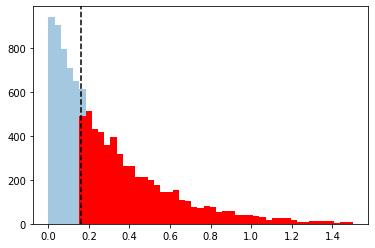

In [38]:
# comparing several groups
x = [7.2, 7.3, 7.8, 8.2, 8.8, 9.5]
y = [8.3, 8.5, 9.2]
z = [7.4, 8.5, 9.0]

# 1. Define test statistic
def t(x,y,z):
  m = np.mean(np.concatenate([x,y,z]))
  a,b,c = [np.mean(v) for v in [x,y,z]]
  return (a-m)**2 + (b-m)**2 + (c-m)**2

# 2. To generate a synthetic dataset, assuming H0
xyz = np.concatenate([x,y,z])
mu_hat = np.mean(xyz)
sigma_hat = np.sqrt(np.mean((xyz-mu_hat)**2))

def rxyz():
  return (np.random.normal(size=len(x), loc=mu_hat, scale=sigma_hat),
          np.random.normal(size=len(y), loc=mu_hat, scale=sigma_hat),
          np.random.normal(size=len(z), loc=mu_hat, scale=sigma_hat))
  
# 3. Sample the test statistic, find the p-value
t_ = np.array([t(*rxyz()) for _ in range(10000)])
p = np.mean(t_ >= t(x,y,z))
print(f'p={p:.3}')
# alternatively, use p = np.sum(np.where(t_ >= t(x,y,z),1,0))/len(t_)

fig,ax = plt.subplots()
bins = np.linspace(0,1.5,50)
ax.hist(t_, bins=bins, alpha=.4)
ax.hist(t_[t_>=t(x,y,z)], bins=bins, color='red')
ax.axvline(t(x,y,z), linestyle='dashed', color='black')
plt.show()

In [39]:
modis

,year,day_of_year,num_fires
0,2003,121,211.0
1,2003,122,354.0
2,2003,123,420.0
3,2003,124,545.0
4,2003,125,578.0
...,...,...,...
2613,2019,270,166959.0
2614,2019,271,167690.0
2615,2019,272,168288.0
2616,2019,273,169157.0


In [40]:
fires

array([36497., 84870., 42063., 73813., 67148., 79890., 74902., 45848.,
       95092.])

p=0.053


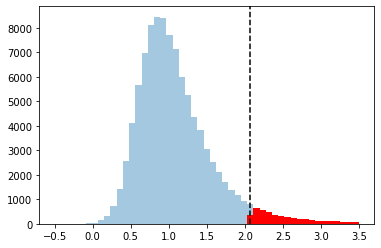

In [41]:
# fires storss the fire occurences from 2011 to 2019

# 1. Define the test statistic
def t(x): return x[-1]/x[-2]

# 2. To generate a synthetic dataset, assuming H0
mu_hat = np.mean(fires)
sigma_hat = np.sqrt(np.mean((fires-mu_hat)**2))

def rx(): return np.random.normal(size=len(fires), loc=mu_hat, scale=sigma_hat)

# 3. Sample the test statistic, compare to observed value, find the p-value
t_ = np.array([t(rx()) for _ in range(100000)])
p = np.mean(t_ >= t(fires))
print(f'p={p:.2}')

fig,ax = plt.subplots()
bins = np.linspace(-.5,3.5,50)
ax.hist(t_, bins=bins, alpha=.4)
ax.hist(t_[t_ >= t(fires)], bins=bins, color='red')
ax.axvline(t(fires), linestyle='dashed', color='black')
plt.show()

In [43]:
import os.path
if os.path.exists('stop-and-search.csv'):
  print('file already downloaded')
else:
  !wget "https://www.cl.cam.ac.uk/teaching/2021/DataSci/data/stop-and-search.csv"
police = pd.read_csv('stop-and-search.csv')

--2021-07-31 14:09:04--  https://www.cl.cam.ac.uk/teaching/2021/DataSci/data/stop-and-search.csv
Resolving www.cl.cam.ac.uk (www.cl.cam.ac.uk)... 128.232.0.20, 2a05:b400:110::80:14
Connecting to www.cl.cam.ac.uk (www.cl.cam.ac.uk)|128.232.0.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 312976614 (298M) [text/csv]
Saving to: ‘stop-and-search.csv’

stop-and-search.csv 100%[===================>] 298.48M  26.1MB/s    in 12s     

2021-07-31 14:09:17 (24.0 MB/s) - ‘stop-and-search.csv’ saved [312976614/312976614]



In [48]:
# Racial bias in police stop-and-search
df = police.loc[~pd.isnull(police['officer_defined_ethnicity']) & ~pd.isnull(police['outcome']) & (police['force']=='cambridgeshire')].copy()
df['eth'] = df['officer_defined_ethnicity']
df['y'] = np.where(df['outcome'] != 'False', 'find', 'nothing')
tab = df.groupby(['y','eth']).apply(len).unstack()

In [49]:
tab

eth,Asian,Black,Other,White
y,,,,
find,116,170,28,1060
nothing,76,100,9,680


In [54]:
x = tab.loc['find']
n = tab.loc['find'] + tab.loc['nothing']

In [68]:
x/n

eth
Asian    0.604167
Black    0.629630
Other    0.756757
White    0.609195
dtype: float64

In [69]:
theta = sum(x) / sum(n)
def rx_star(): return [np.random.binomial(nk, theta) for nk in n]

0.07671734234234229

p=0.117


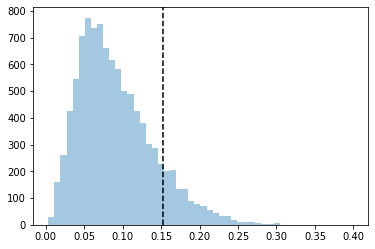

In [71]:
# 1. define the null hypothesis model
x = tab.loc['find']
n = tab.loc['find'] + tab.loc['nothing']
theta = sum(x) / sum(n)
def rx_star(): return [np.random.binomial(nk, theta) for nk in n]

# 2. define test statitic
def d(x):
  beta = x / n
  res = 0
  for e1 in range(len(n)):
    for e2 in range(len(n)):
      res = max(res, abs(beta[e1] - beta[e2]))
  return res

# 3. generate the synthetic dataset
d_samples = np.array([d(rx_star()) for _ in range(10000)])

# 4. find the p-value
d_actual = d(x)
plt.hist(d_samples, bins=50, alpha=.4)
plt.axvline(d_actual, color='black', linestyle='dashed')
p = np.mean(d_samples > d_actual)
print(f'p={p:.3}')

p=0.0744


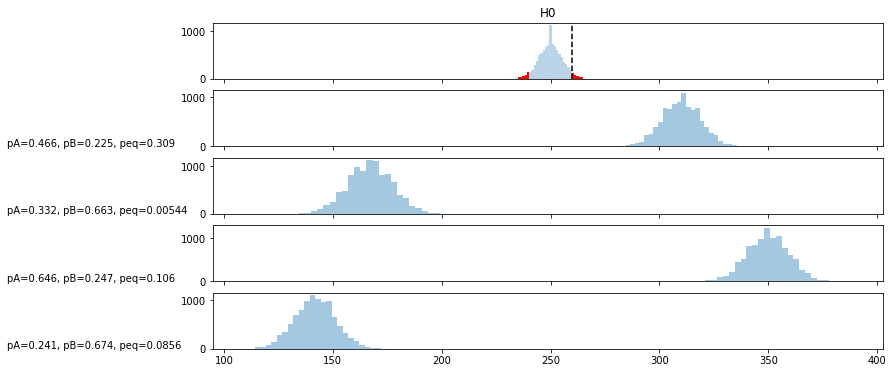

In [106]:
# Sign test

# 1. define null hypothesis model
n = (nA, nB, neq) = (70,50,380)
p = [((nA+nB)/2)/sum(n), ((nA+nB)/2)/sum(n), neq/sum(n)]
def rn_star(p): return np.random.multinomial(n=sum(n),pvals=p)

# 2. define test statistic
def t(nA,nB,neq): return nA + neq/2

# 3. generate the synthetic dataset
t_samples = np.array([t(*rn_star(p)) for _ in range(10000)])

# 4. find p-value, plot histogram
p = 2 * min(np.mean(t_samples >= t(*n)), np.mean(t_samples <= t(*n)))
print(f'p={p:.3}')
fig,axs = plt.subplots(5,1, sharex= True, figsize=(12,6))
bins = np.linspace(235, 265, 30)
axs[0].hist(t_samples, bins=bins, alpha=.3)
axs[0].hist(t_samples[t_samples >= t(*n)], bins=bins, color='red')
axs[0].hist(t_samples[t_samples <= np.quantile(t_samples, p/2)], bins=bins, color='red')
axs[0].axvline(t(*n), linestyle='dashed', color='black')
axs[0].set_title('H0')

for ax in axs[1:]:
  p = np.random.uniform(size=3)
  p = p/sum(p)
  ax.hist([t(*rn_star(p)) for _ in range(10000)], bins=30, alpha=.4)
  ax.text(0.5, 5, f'pA={p[0]:.3}, pB={p[1]:.3}, peq={p[2]:.3}')

In [108]:
# non-parametric resampling
x = [7.2, 7.3, 7.8, 8.2, 8.8, 9.5]
def rx_star(): return np.random.choice(x, size=len(x))
xbar_sample = [np.mean(rx_star()) for _ in range(10000)]
lo, hi = np.quantile(xbar_sample, [0.025, 0.975])
print(f'lo={lo:.3}, hi={hi:.3}')

lo=7.5, hi=8.82


95% confidence interval: [0.257, 3.0]


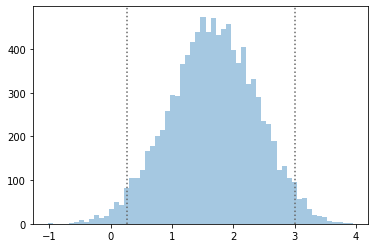

In [112]:
x = [4.3, 5.1, 6.1, 6.8, 7.4, 8.8, 9.9]
y = [8.3, 8.5, 8.9]

# 1. define the readout statistic
def t(x,y): return np.mean(y) - np.mean(x)

# 2. generate a synthetic dataset
def rxy_star(): 
  # sampling from the empirical distribution, 
  # return a synthetic dataset of the same shape as the dataset we are given
  return (np.random.choice(x, size=len(x)),
          np.random.choice(y, size=len(y)))

# 3. sample the readout statistic and report its spread
t_ = [t(*rxy_star()) for _ in range(10000)]
lo,hi = np.quantile(t_, [.025, .975])
print(f'95% confidence interval: [{lo:.3}, {hi:.3}]')

fig,ax = plt.subplots()
ax.hist(t_, bins=60, alpha=.4)
ax.axvline(lo, linestyle='dotted', color='0.4')
ax.axvline(hi, linestyle='dotted', color='0.4')
plt.show()

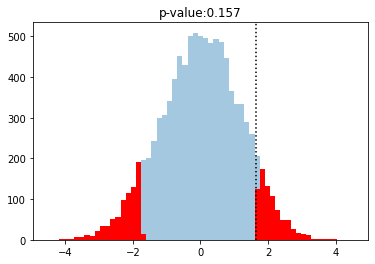

In [125]:
# 2. define test statistic
def t(x,y): return np.mean(y) - np.mean(x)

# 3. to generate a synthetic dataset under the null hypothesis
def rxy():
  return (np.random.choice(np.concatenate([x,y]), size=len(x)),
          np.random.choice(np.concatenate([x,y]), size=len(y)))

t_samples = np.array([t(*rxy()) for _ in range(10000)])

# 4. plot histogram and find p-value
p = 2 * min(np.mean(t_samples >= t(x,y)), np.mean(t_samples <= t(x,y))) 
fig,ax = plt.subplots()
bins = np.linspace(-4.5, 4.5, 60)
ax.hist(t_samples, bins=bins, alpha=.4)
ax.hist(t_samples[t_samples >= t(x,y)], bins=bins, color='red')
ax.hist(t_samples[t_samples <= np.quantile(t_samples, p/2)], bins=bins, color='red')
ax.axvline(t(x,y), linestyle='dotted', color='black')
ax.set_title(f'p-value:{p:.3}')
plt.show()

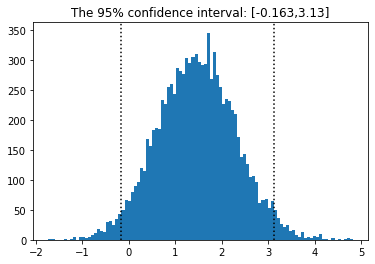

In [118]:
csn = np.array([0,0,0,2,2,2,1,0,3,2,4,8,6,2,8,8,4,4,6,4,2])
nstn = np.array([1,0,0,1,1,0,1,4,2,0,2,2,8,6,4,3,1,2,0,1,1])
m = np.arange(0,21)

# 1. define a readout statistic
def t(x,y): return np.mean(x) - np.mean(y)

# 2. resampling to generate a synthetic dataset
def cs_star(): return np.random.choice(m, p=csn/np.sum(csn), size=np.sum(csn))
def nst_star(): return np.random.choice(m, p=nstn/np.sum(nstn), size=np.sum(nstn))

# 3. sample the readout statistic and report its spread 
diff_sample = [t(cs_star(), nst_star()) for _ in range(10000)]
lo, hi = np.quantile(diff_sample, [.025, .975])

fig, ax = plt.subplots()
ax.hist(diff_sample, bins=100)
ax.axvline(lo, linestyle='dotted', color='black')
ax.axvline(hi, linestyle='dotted', color='black')
ax.set_title(f'The 95% confidence interval: [{lo:.3},{hi:.3}]')
plt.show()